In [2]:
import missingno as msno
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
movies = pd.read_csv("./Data/movies_dataset_clean.csv")

In [4]:
# Chequeo de valores nulos
print("### Chequeo de Nulos")
print(movies.isnull().sum())

### Chequeo de Nulos
collection_name         40888
budget                      0
genres                      0
id                          0
original_language          11
overview                  941
popularity                  0
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                   246
spoken_languages            0
status                     80
tagline                 24978
title                       0
vote_average                0
vote_count                  0
release_year                0
return                      0
dtype: int64


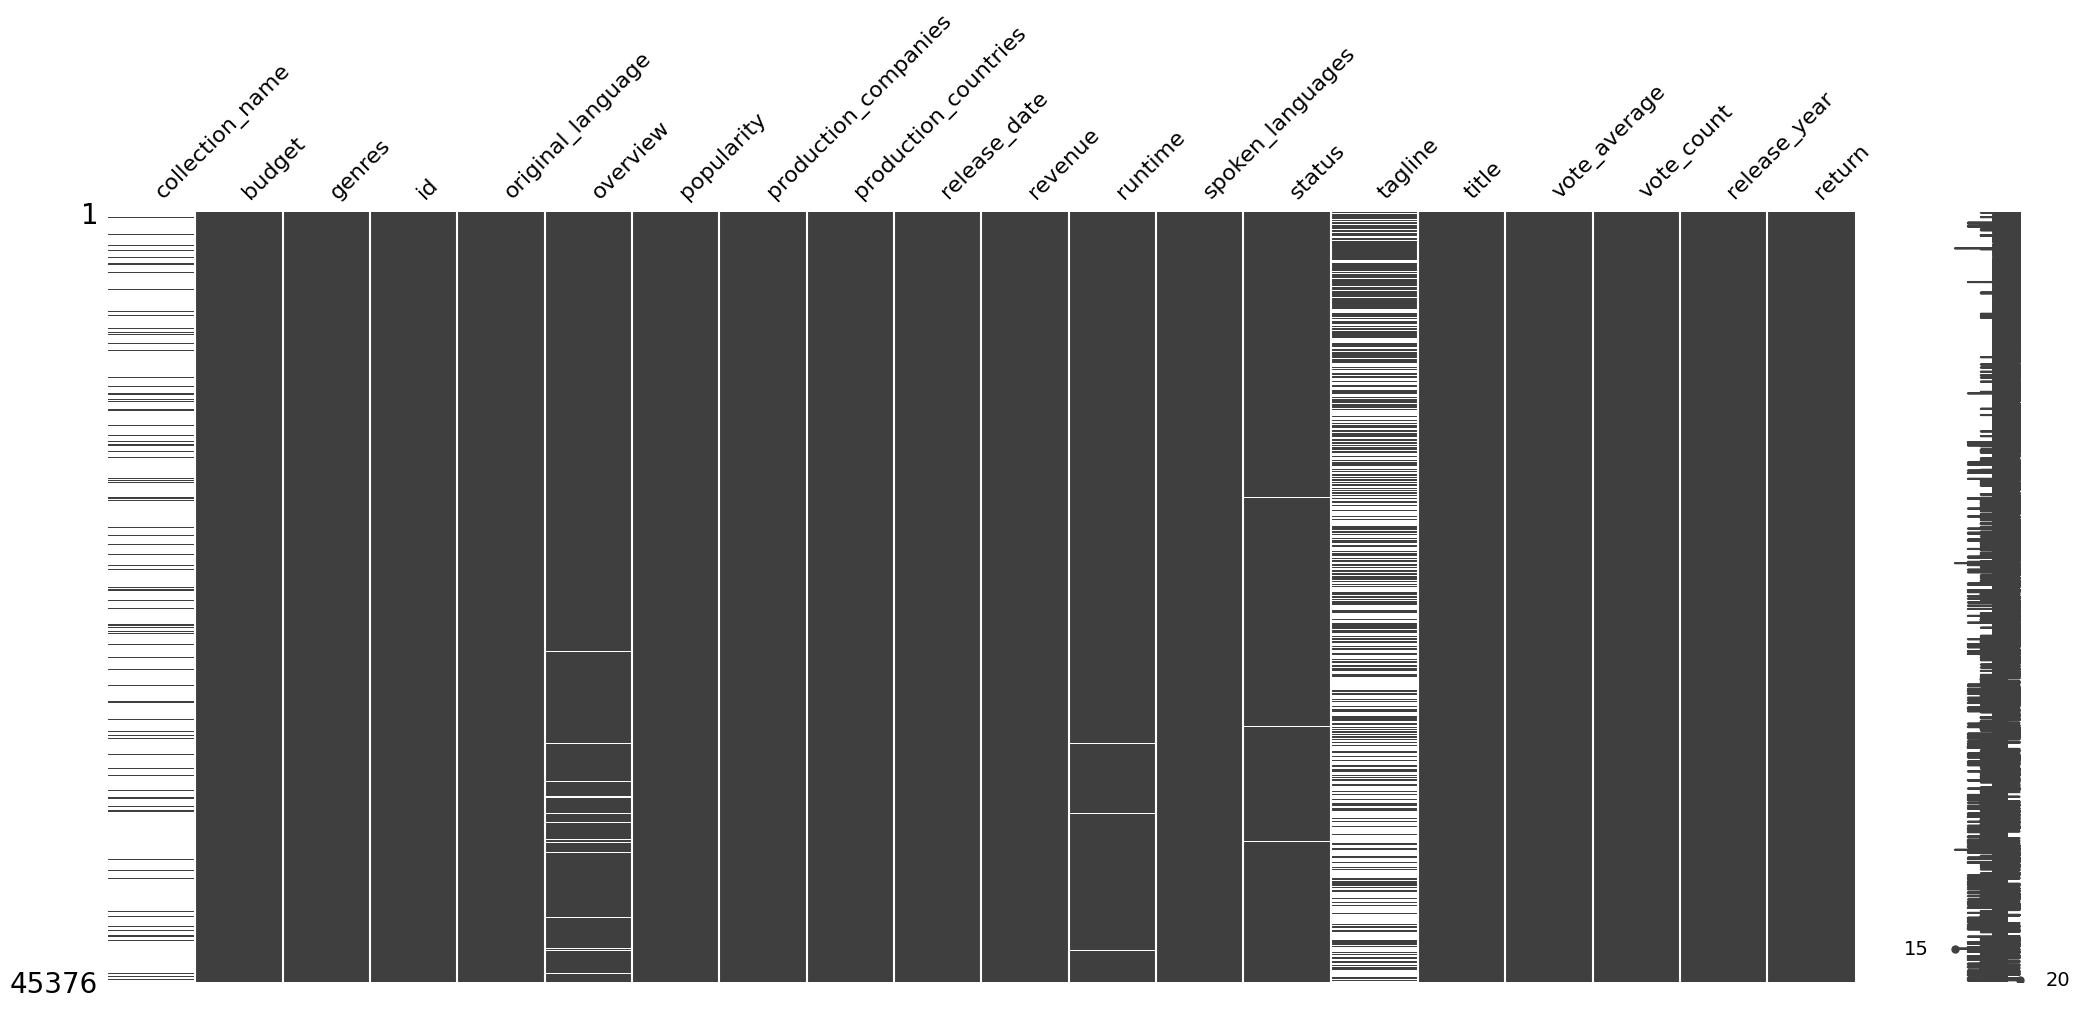

In [5]:
# Visualización de valores nulos
msno.matrix(movies)
plt.show()

In [7]:
# Chequeo de valores duplicados
duplicados = movies.duplicated().sum()
print(f"Valores duplicados: {duplicados}")


Valores duplicados: 17


In [22]:
# Encontrar las filas duplicadas
duplicated_rows = movies[movies.duplicated()]

duplicated_rows

,collection_name,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
1463,NaN,0.0,"['Drama', 'Romance']",105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,"['Studio Babelsberg', 'Centre National de la C...",['Germany'],1995-02-16,0.0,115.0,['Deutsch'],Released,"A love, a hope, a wall.",The Promise,5.0,1.0,1995,0.0
9160,NaN,0.0,"['Crime', 'Drama', 'Thriller']",5511,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,"['Fida cinematografica', 'Compagnie Industriel...","['France', 'Italy']",1967-10-25,39481.0,105.0,['Français'],Released,There is no solitude greater than that of the ...,Le Samouraï,7.9,187.0,1967,0.0
9322,NaN,0.0,"['Adventure', 'Animation', 'Drama', 'Action', ...",23305,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,['Filmfour'],"['France', 'Germany', 'India', 'United Kingdom']",2001-09-23,0.0,86.0,['हिन्दी'],Released,NaN,The Warrior,6.3,15.0,2001,0.0
13370,NaN,0.0,"['Thriller', 'Mystery']",141971,fi,Recovering from a nail gun shot to the head an...,0.411949,['Filmiteollisuus Fine'],['Finland'],2008-12-26,0.0,108.0,['suomi'],Released,Which one is the first to return - memory or t...,Blackout,6.7,3.0,2008,0.0
16757,NaN,0.0,"['Thriller', 'Mystery']",141971,fi,Recovering from a nail gun shot to the head an...,0.411949,['Filmiteollisuus Fine'],['Finland'],2008-12-26,0.0,108.0,['suomi'],Released,Which one is the first to return - memory or t...,Blackout,6.7,3.0,2008,0.0
21143,NaN,0.0,"['Fantasy', 'Drama', 'Science Fiction']",119916,en,"Prospero, the true Duke of Milan is now living...",0.000018,[],[],1980-02-27,0.0,123.0,[],Released,NaN,The Tempest,0.0,0.0,1980,0.0
21830,NaN,0.0,"['Drama', 'Science Fiction', 'Animation']",152795,en,More than two decades after catapulting to sta...,8.534039,"['Pandora Filmproduktion', 'Entre Chien et Lou...","['Belgium', 'France', 'Germany', 'Israel', 'Lu...",2013-05-16,455815.0,122.0,['English'],Released,NaN,The Congress,6.4,165.0,2013,0.0
22125,NaN,0.0,"['Action', 'Horror', 'Science Fiction']",18440,en,When a comet strikes Earth and kicks up a clou...,1.436085,[],['United States of America'],2007-01-01,0.0,89.0,['English'],Released,NaN,Days of Darkness,5.0,5.0,2007,0.0
23017,NaN,0.0,['Drama'],25541,da,Former Danish servicemen Lars and Jimmy are th...,2.587911,[],"['Sweden', 'Denmark']",2009-10-21,0.0,90.0,['Dansk'],Released,NaN,Brotherhood,7.1,21.0,2009,0.0
24814,NaN,0.0,"['Comedy', 'Drama']",11115,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,"['Andertainment Group', 'Crescent City Picture...",['United States of America'],2008-01-29,0.0,85.0,['English'],Released,NaN,Deal,5.2,22.0,2008,0.0


In [9]:
# Tipos de datos
print(movies.dtypes)

collection_name          object
budget                  float64
genres                   object
id                        int64
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count              float64
release_year              int64
return                  float64
dtype: object


In [12]:
# Análisis estadístico de datos
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.537600e+04,45376.000000,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.000000,45376.000000,4.537600e+04
mean,4.232604e+06,108027.103094,2.926458,1.123010e+07,94.181675,5.624070,110.096439,1991.881193,6.600428e+02
std,1.743986e+07,112168.377996,6.009672,6.438996e+07,38.341059,1.915423,491.742894,24.055360,7.469329e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26385.750000,0.388840,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59857.500000,1.130454,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156533.500000,3.691695,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


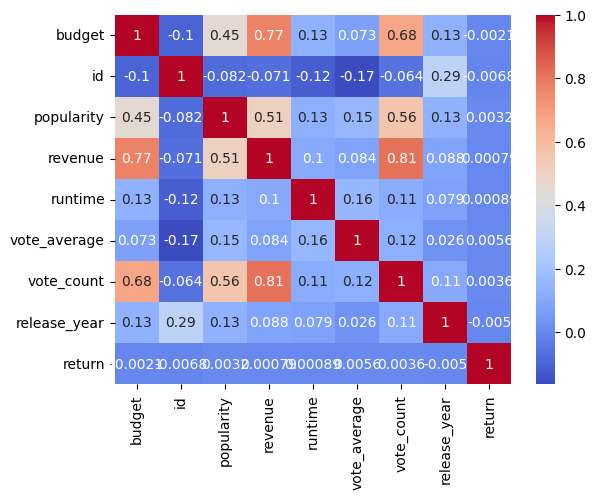

In [14]:
# Análisis de correlaciones
# Filtrar solo columnas numéricas
numeric_cols = movies.select_dtypes(include=[float, int])

# Heatmap de correlación
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

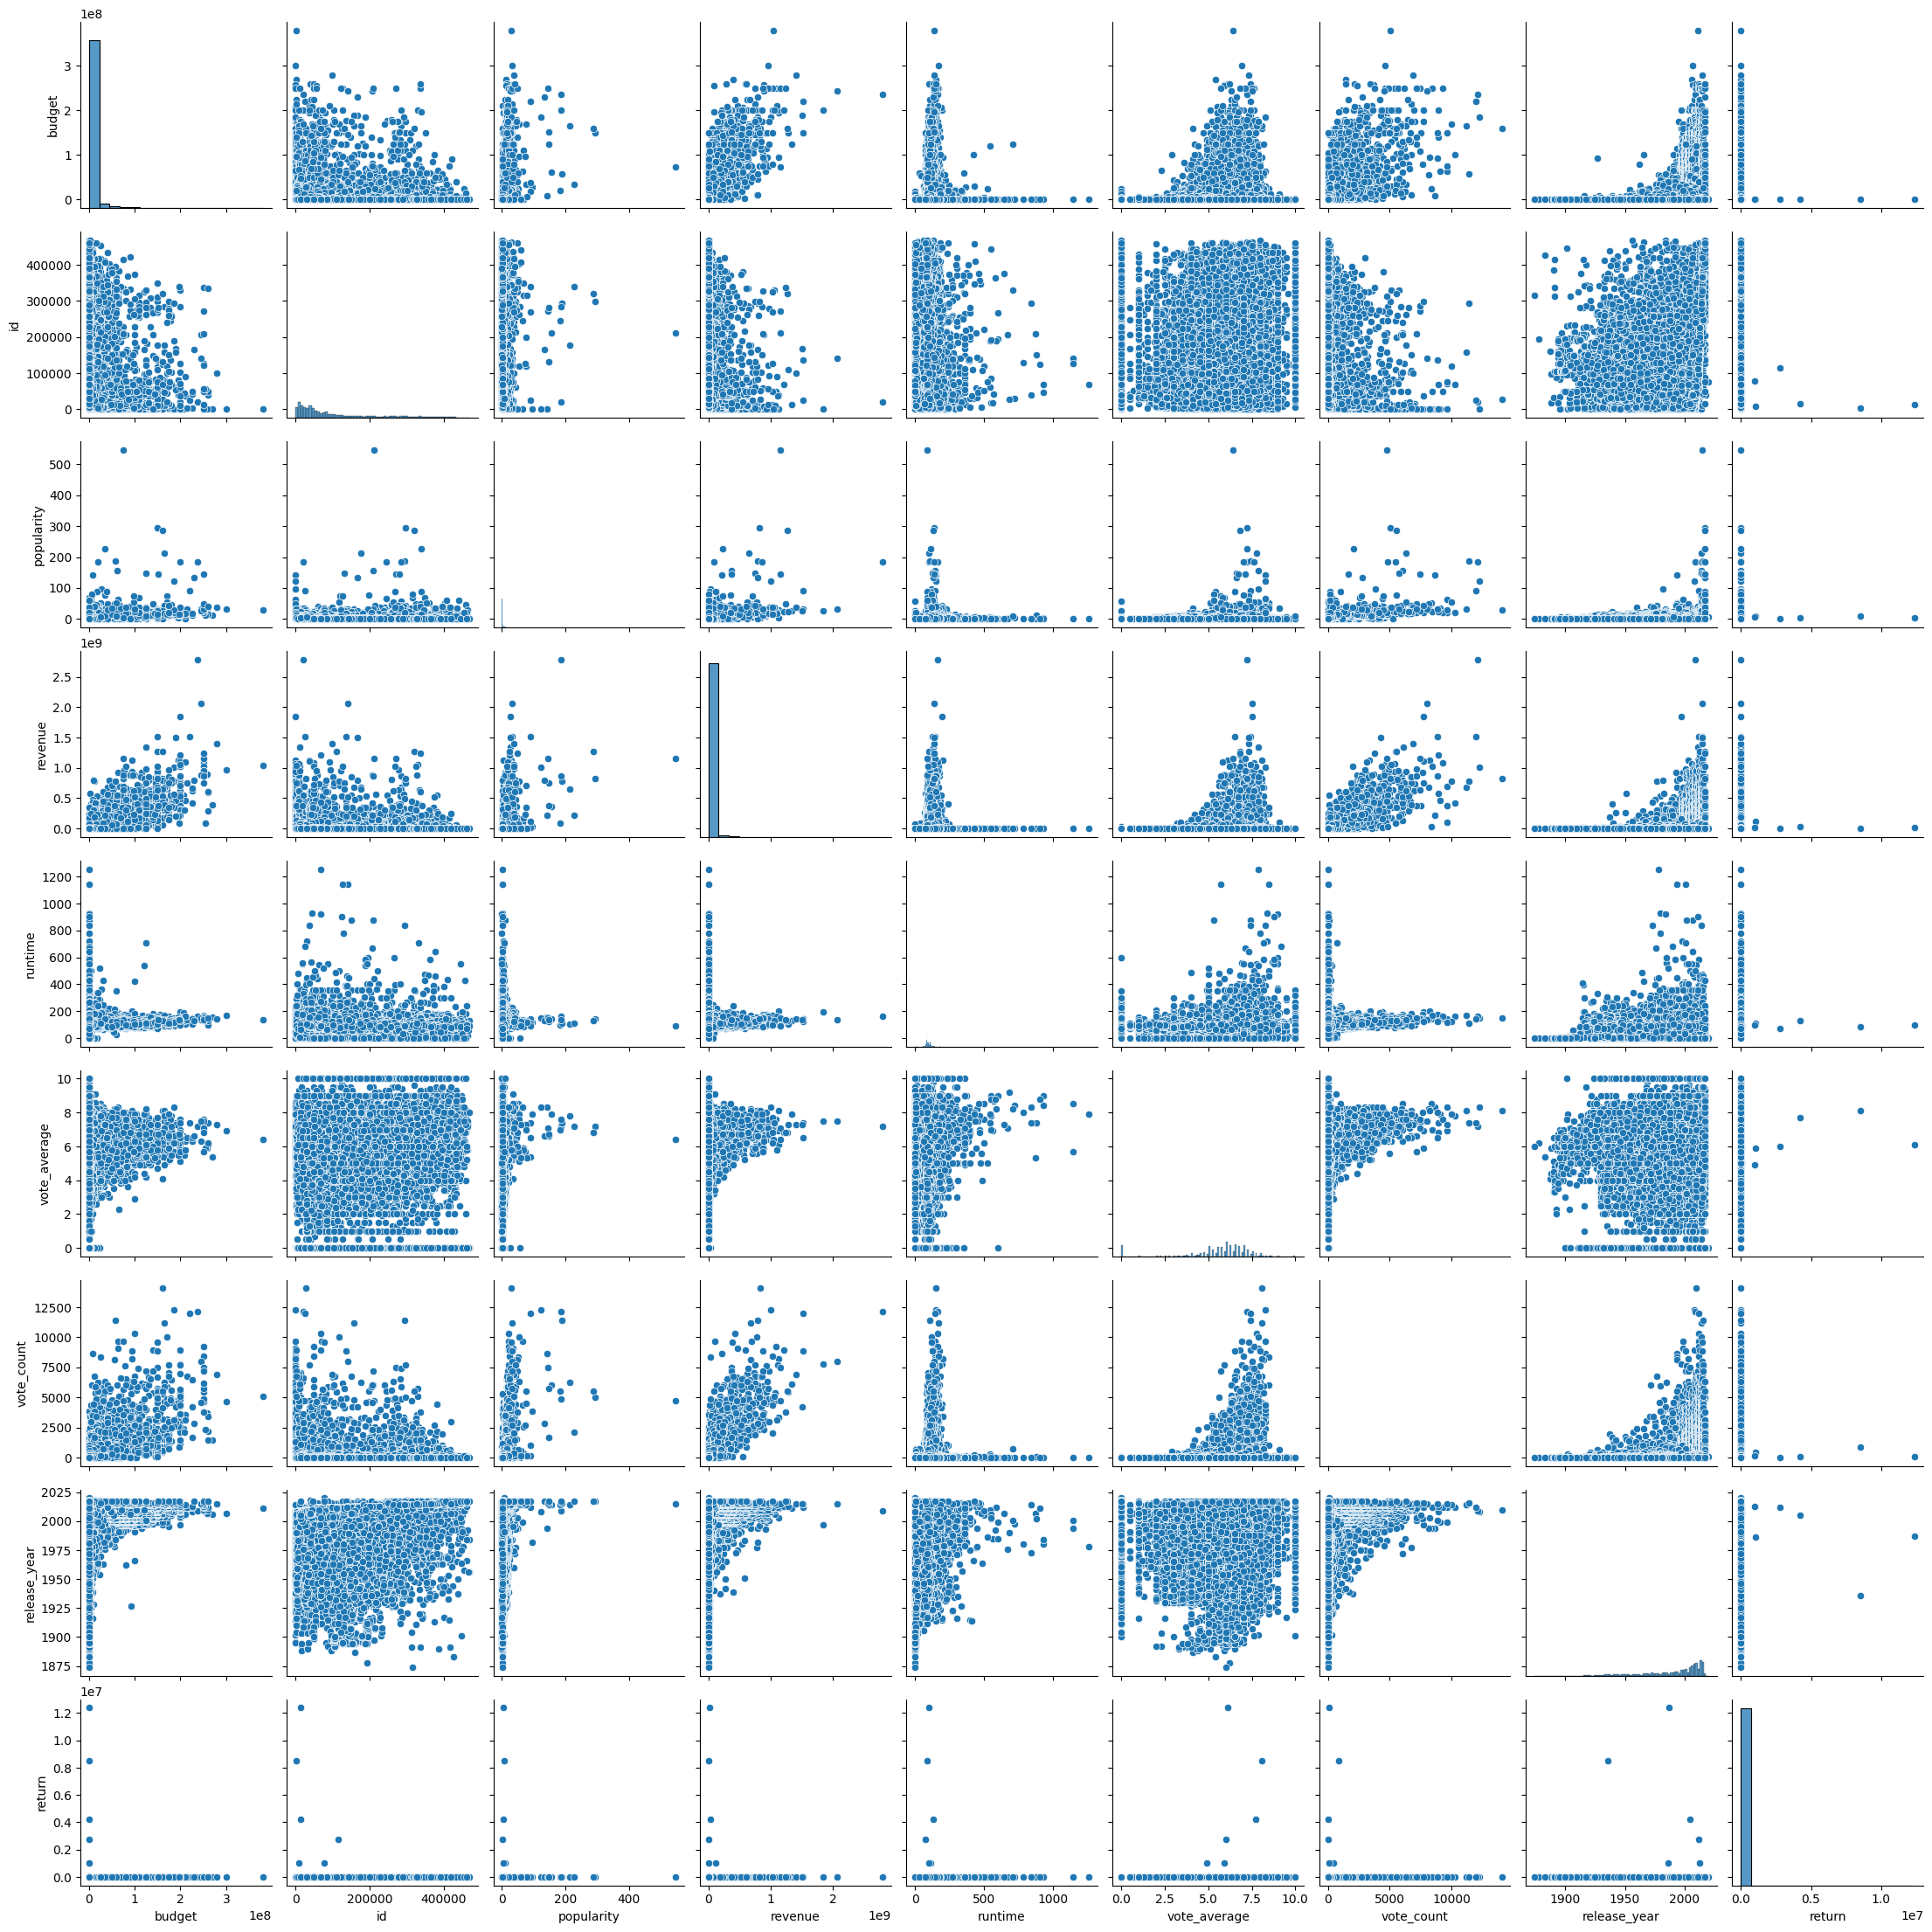

In [15]:
# Análisis de correlaciones bivariado
sns.pairplot(numeric_cols)
plt.show()

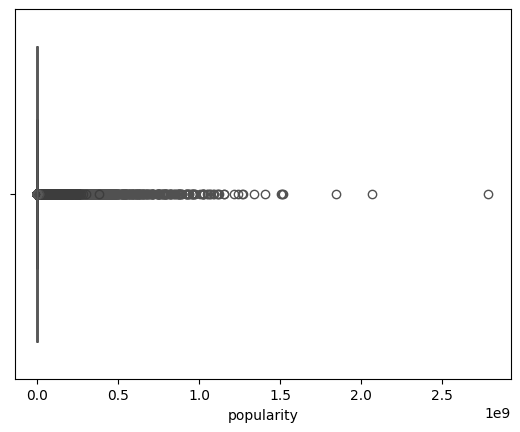

In [29]:
sns.boxplot(x=movies['popularity'])
plt.show()


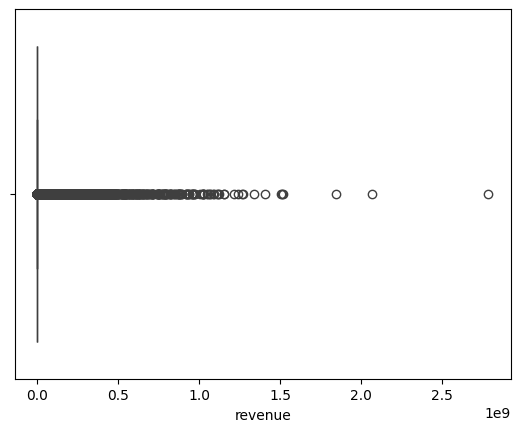

In [30]:
sns.boxplot(x=movies['revenue'])
plt.show()

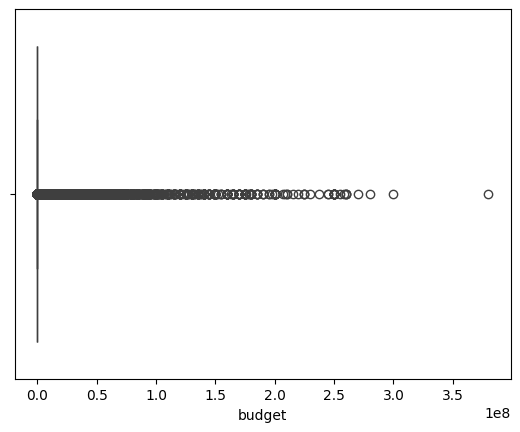

In [31]:

sns.boxplot(x=movies['budget'])

plt.show()

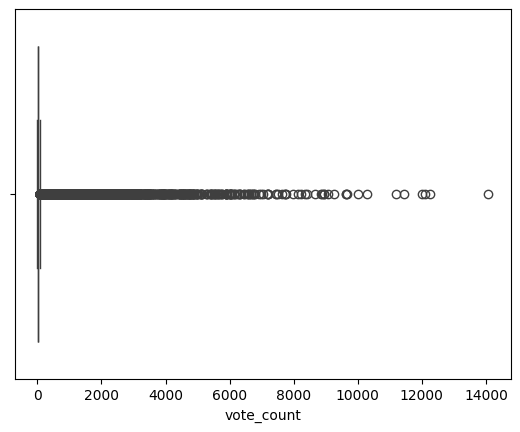

In [32]:

sns.boxplot(x=movies['vote_count'])
plt.show()

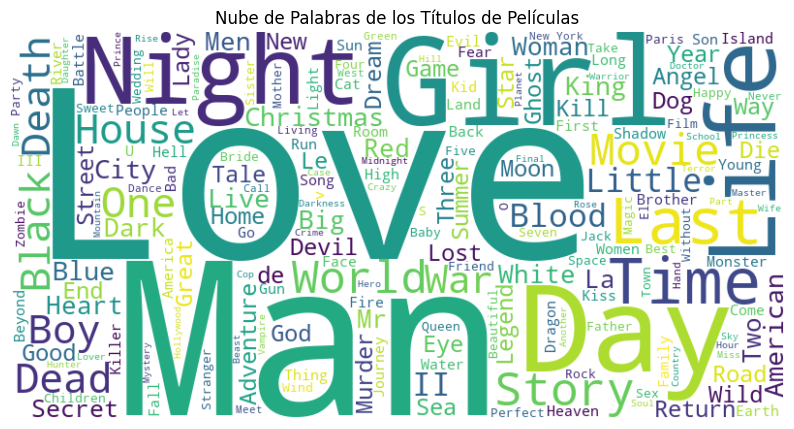

In [36]:
title_text = ' '.join(movies['title'].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras de los Títulos de Películas")
plt.show()

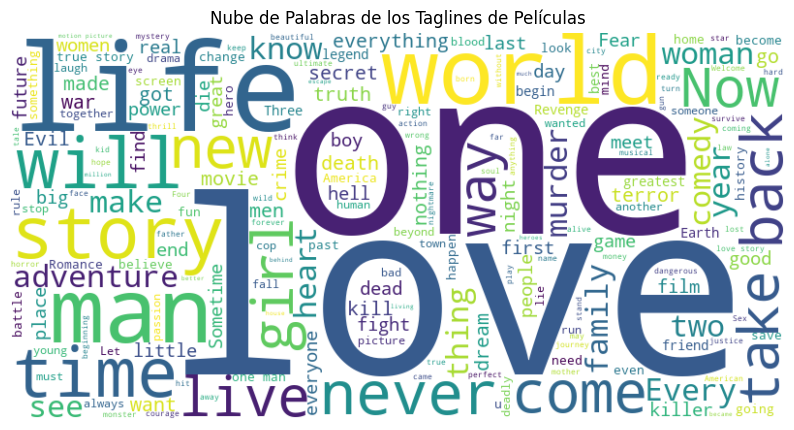

In [37]:
tagline_text = ' '.join(movies['tagline'].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tagline_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras de los Taglines de Películas")
plt.show()

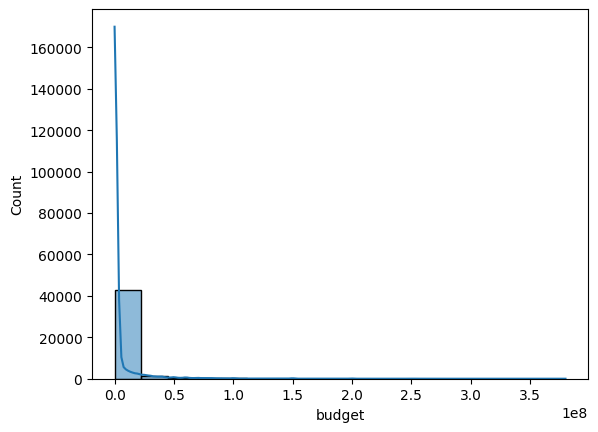

In [17]:
# Ejemplo de análisis más detallado para una columna específica
sns.histplot(movies['budget'], kde=True)
plt.show()

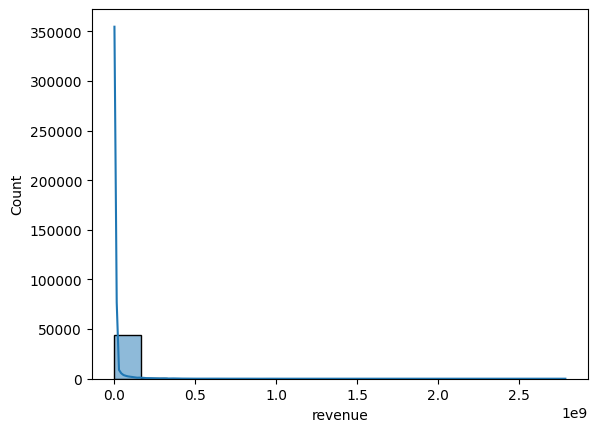

In [18]:
sns.histplot(movies['revenue'], kde=True)
plt.show()

In [39]:
from ydata_profiling import ProfileReport

profile = ProfileReport(movies)
profile.to_file("data_profile.html")

Summarize dataset:  81%|████████▏ | 22/27 [00:04<00:01,  2.79it/s, Calculate auto correlation]            c:\Users\aje0v\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Released'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 92.06it/s]
